In [145]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["patch.force_edgecolor"] = True
import fractions

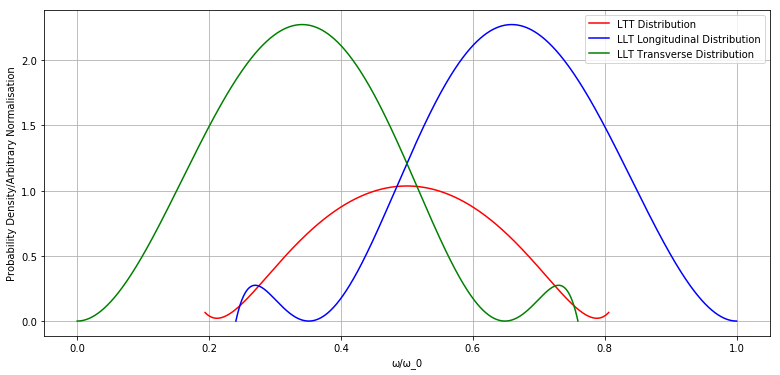

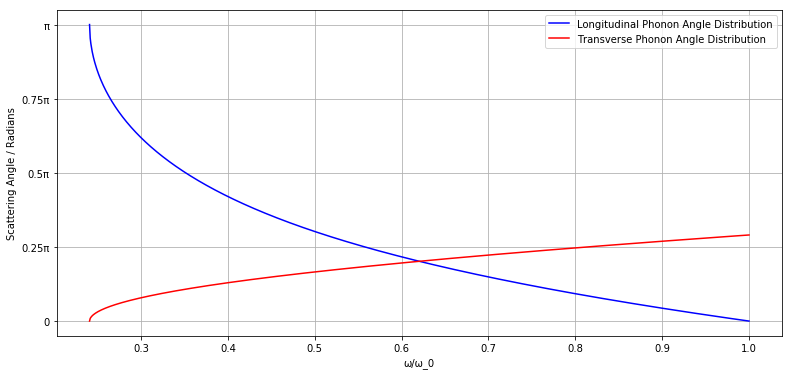

In [146]:
V_L = 5.31
V_T = 3.25

d = V_L/V_T

x_min_LLT = (d-1)/(d+1)
x_max_LLT = 0.99999999

x_min_T_LLT = 1 - x_max_LLT
x_max_T_LLT = 1 - x_min_LLT

x_T_LLT = np.linspace(x_min_T_LLT, x_max_T_LLT, 1000)

x_LLT = np.linspace(x_min_LLT, x_max_LLT, 1000)

def dist_LLT(x):
    return (x ** -2) * (1 - x ** 2) ** 2 * \
           ((1 + x) ** 2 - (d ** 2) * (1 - x) ** 2) * \
           (1 + x ** 2 - (d ** 2) * (1 - x) ** 2) ** 2
        
def dist_T_LLT(x):
    return dist_LLT(1-x)

def cos_L_LLT(x):
    return (1 + x ** 2 - (d ** 2) * (1 - x) ** 2) / (2 * x)
def cos_T_LLT(x):
    return (1 - x ** 2 + (d ** 2) * (1 - x) ** 2) / (2 * d * (1 - x))

def cos_T_LTT(x):
    return (1 - d ** 2 + 2 * x * d)/(2 * x)
def cos_T2_LTT(x):
    return (1 - x * cos_T_LTT(x)) / (d - x)

x_min_LTT = (d-1)/(2*d) 
x_max_LTT = (d+1)/(2*d)

x_LTT = np.linspace(x_min_LTT, x_max_LTT, 1000)

def dist_LTT(x):
    x = d*x
    b = -0.429
    g = -0.945
    l = 0.524
    m = 0.680

    A = (1 / 2) * (1 - d ** 2) * (b + l + (1 + d ** 2) * (g + m))
    B = b + l + 2 * (d ** 2) * (g + m)
    C = b + l + 2 * (g + m)
    D = (1 - d ** 2) * (2 * b + 4 * g + l + 3 * m)

    y = (A + B * d * x - B * x ** 2) ** 2 + \
    (C * x * (d - x) - (D / (d - x)) * (x - d - (1 - d ** 2) / (4 * x))) ** 2
    return y

plt.figure(figsize=(13, 6))
plt.plot(x_LTT, dist_LTT(x_LTT), label="LTT Distribution", c="r")
plt.plot(x_LLT, dist_LLT(x_LLT), label="LLT Longitudinal Distribution", c="b")
plt.plot(x_T_LLT, dist_T_LLT(x_T_LLT), label="LLT Transverse Distribution", c="g")
plt.xlabel('ω/ω_0')
plt.ylabel('Probability Density/Arbitrary Normalisation')
plt.grid()
plt.legend(loc='best')
plt.show()


f,ax = plt.subplots(figsize=(13, 6))
plt.figure(figsize=(13, 6))
ax.grid()
ax.set_yticks([0, np.pi/4.0, np.pi/2.0, 3*np.pi/4.0, np.pi])
ax.set_yticklabels(["0", "0.25π", "0.5π", "0.75π", "π"])
ax.plot(x_LLT, np.arccos(cos_L_LLT(x_LLT)), label="Longitudinal Phonon Angle Distribution", c="b")
ax.plot(x_LLT, np.arccos(cos_T_LLT(x_LLT)), label="Transverse Phonon Angle Distribution", c="r")
ax.legend(loc='best')
ax.set_ylabel('Scattering Angle / Radians')
ax.set_xlabel('ω/ω_0')
plt.show()

In [150]:
def accept_reject(x_min, x_max, rand_max, f):
    while True:
        rand_x = np.random.uniform(x_min, x_max)
        rand_draw = np.random.uniform(0, rand_max)
    
        if rand_draw <= f(rand_x):
            return rand_x

N_points = 10000
n_bins = 100

y_LLT_L = []
y_LLT_T = []

# LLT Distributions
for i in range(N_points):
    # LLT L Distribution
    x_val_LLT = accept_reject(x_min_LLT, x_max_LLT, 2.5, dist_LLT)
    angle_LLT_L = np.arccos(cos_L_LLT(x_val_LLT))
    y_LLT_L.append(angle_LLT_L)
    
    # LLT T Distribution
    angle_LLT_T = np.arccos(cos_T_LLT(x_val_LLT))
    y_LLT_T.append(angle_LLT_T)

y_LLT_L = np.array(y_LLT_L)
y_LLT_T = np.array(y_LLT_T)
   
fig, ax = plt.subplots(1,1, figsize=(10,7))

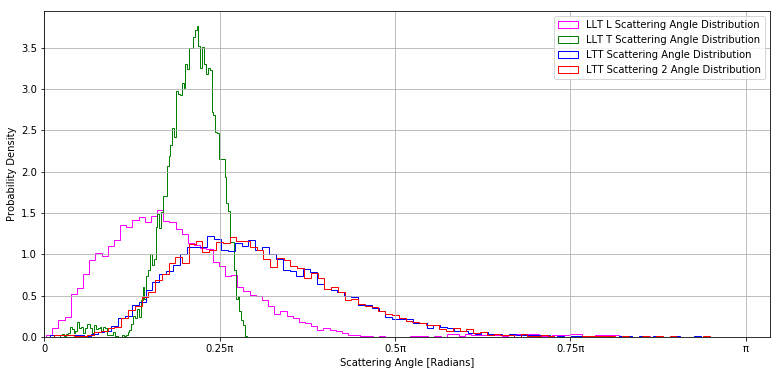

In [159]:
#LTT Distributions
y_LTT = []
y_LTT_2 = []
for i in range(N_points):
    x_val = accept_reject(x_min_LTT, x_max_LTT, 10, dist_LTT)
    angle = np.arccos(cos_T_LTT(x_val*d))
    angle_2 = np.arccos(cos_T2_LTT(x_val*d))
    
    y_LTT.append(angle)
    y_LTT_2.append(angle_2)

y_LTT = np.array(y_LTT)
y_LTT_2 = np.array(y_LTT_2)
    
fig, ax = plt.subplots(1,1, figsize=(13,6))
ax.hist(y_LLT_L, bins=n_bins, label="LLT L Scattering Angle Distribution", normed=1, edgecolor='magenta', fill=False, histtype = 'step')
ax.hist(y_LLT_T, bins=n_bins, label="LLT T Scattering Angle Distribution", normed=1, edgecolor='green', fill=False, histtype = 'step')
ax.hist(y_LTT, bins=n_bins, label="LTT Scattering Angle Distribution", normed=1, edgecolor="blue", fill=False, histtype = 'step')
ax.hist(y_LTT_2, bins=n_bins, label="LTT Scattering 2 Angle Distribution", normed=1, edgecolor="red", fill=False, histtype = 'step')

ax.legend(loc='best')
ax.grid()
ax.set_xlim(0)
ax.set_xticks([0, np.pi/4.0, np.pi/2.0, 3*np.pi/4.0, np.pi])
ax.set_xticklabels(["0", "0.25π", "0.5π", "0.75π", "π"])
ax.set_xlabel('Scattering Angle [Radians]')
ax.set_ylabel('Probability Density')
plt.show()

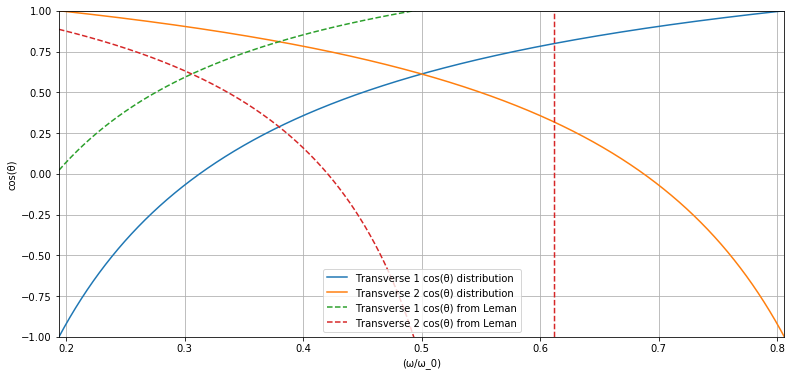

In [209]:
def angle_LTT(x):
    return (1 - d**2 + 2*x*d)/(2*x)
def angle_LTT_2(x):
    return (1 - x * angle_LTT) / (d - x)

def fraud_1(x):
    return (1 - (d ** 2) * (1 - x)**2 + (d**2) * (x**2))/(2 * d * x)

def fraud_2(x):
    return (1 - (d**2)*(x**2) + (d**2)*(1-x)**2)/(2*d*(1-x))

x = np.linspace((d-1)/(2*d), (d+1)/(2*d), 10000)
plt.figure(figsize=(13,6))
plt.plot(x, cos_T_LTT(d*x), label='Transverse 1 cos(θ) distribution')
plt.plot(x, cos_T2_LTT(d*x), label='Transverse 2 cos(θ) distribution')
plt.plot(x, fraud_1(d*x), label="Transverse 1 cos(θ) from Leman", linestyle='--')
plt.plot(x, fraud_2(d*x), label="Transverse 2 cos(θ) from Leman", linestyle='--')
plt.xlim((d-1)/(2*d), (d+1)/(2*d))
plt.ylim(-1, 1)
plt.grid()

plt.legend(loc='best')
plt.xlabel('(ω/ω_0)')
plt.ylabel('cos(θ)')
plt.show()

In [210]:
print(1/d)

0.6120527306967986
